In [1]:
from SLiCAP import *
initProject("CSstage small-signal dynamic behavior")

Succesfully self-tested the Maxima command.
SLiCAP Version matches with the latest release of SLiCAP on github.
Running from an Ipython enviroment, importing SLiCAPnotebook.
Sarting Maxima client on port 53118
Maxima CAS client is active and functions have been uploaded.
Compiling library: SLiCAP.lib.
Compiling library: SLiCAPmodels.lib.


In [16]:
from CSstageEKV import gm, go, cgs, cgb, cdg, cdb

# Uncomment the next line if you want to overwrite the main html index page
#prj = initProject('CSstageSmallSignal');

# Generate netlist
#makeNetlist('CSstageModel.asc', 'CS stage MOS small-signal model');

i1 = instruction()
i1.setCircuit('CSstageModel3.cir')
# This creates an new index page in the html report and links to new pages
# will now be placed on this index page
i1.defPar('g_m', gm)
i1.defPar('g_o', go)
i1.defPar('c_gs', cgs)
i1.defPar('c_gb', cgb)
i1.defPar('c_dg', cdg)
i1.defPar('c_db', cdb)

Checking netlist: C:\Users\User\Documents\GitHub\SLiCAP_python\files\examples\Chapter5\SLiCAP/cir/CSstageModel3.cir


In [10]:

htmlPage('Circuit data')
head2html('Circuit diagram')
img2html('CSstageModel.svg', 600)
netlist2html('CSstageModel2.cir')
elementData2html(i1.circuit)
params2html(i1.circuit)

Error: could note open 'C:\Users\User\Documents\GitHub\SLiCAP_python\files\examples\Chapter5\SLiCAP/cir/CSstageModel2.cir'.


'<table><caption>Table: Parameter definitions in \'R1\'.</caption>\n<tr><th class="left">Name</th><th class="left">Symbolic</th><th class="left">Numeric</th></tr>\n<tr><td class="left">$$R_{L}$$</td><td class="left">$$1.0 \\cdot 10^{4}$$</td><td class="left">$$1.0 \\cdot 10^{4}$$</td></tr>\n<tr><td class="left">$$R_{s}$$</td><td class="left">$$50$$</td><td class="left">$$50.0$$</td></tr>\n<tr><td class="left">$$c_{db}$$</td><td class="left">$$1.8 \\cdot 10^{-15}$$</td><td class="left">$$1.8 \\cdot 10^{-15}$$</td></tr>\n<tr><td class="left">$$c_{dg}$$</td><td class="left">$$4.6 \\cdot 10^{-15}$$</td><td class="left">$$4.6 \\cdot 10^{-15}$$</td></tr>\n<tr><td class="left">$$c_{gb}$$</td><td class="left">$$1.608 \\cdot 10^{-15}$$</td><td class="left">$$1.608 \\cdot 10^{-15}$$</td></tr>\n<tr><td class="left">$$c_{gs}$$</td><td class="left">$$1.496 \\cdot 10^{-14}$$</td><td class="left">$$1.496 \\cdot 10^{-14}$$</td></tr>\n<tr><td class="left">$$g_{m}$$</td><td class="left">$$0.00157$$</td>

Error in plot data of 'magZtModel.svg'.


No handles with labels found to put in legend.


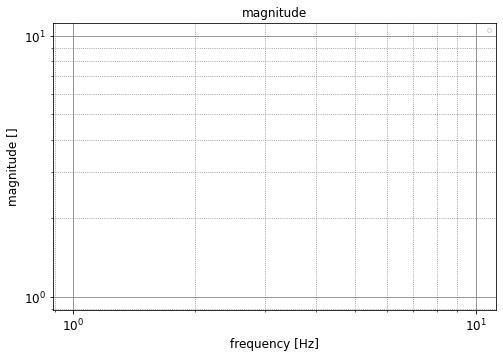

NameError: name 'LTmag' is not defined

In [11]:
htmlPage('CS stage small-signal dynamic behavior')
i1.setSimType('numeric');
i1.setGainType('gain');
i1.setDataType('laplace');
i1.setSource('V1');
i1.setDetector('V_out');
gainModel = i1.execute()

head2html('Numeric expression')
eqn2html('Z_t', normalizeRational(gainModel.laplace))

head2html('Bode plots')
magZtModel = plotSweep('magZtModel', 'magnitude', gainModel, 1, 100e9, 200, funcType = 'mag', show=True)
traces2fig(LTmag, magZtModel)
magZtModel.plot()
fig2html(magZtModel, 600)
phaseZtModel = plotSweep('phaseZtModel', 'phase', gainModel, 1, 100e9, 200, funcType = 'phase', show=True)
traces2fig(LTphase, phaseZtModel)
phaseZtModel.plot()
fig2html(phaseZtModel, 600)

i1.setDataType('pz')
pz2html(i1.execute())

In [12]:
# Let us define an instruction to display the symbolic MNA matrix equation.
# This is done by defining attributes of the instruction object 'i1'
i1.setSimType('symbolic');
i1.setGainType('vi');
i1.setDataType('matrix');

In [13]:
# We execute the instruction and assign the result to a variable 'MNA'
MNA = i1.execute();

In [14]:
# We will put the instruction on a new HTML page and display it in this notebook
htmlPage('Matrix equations')
# Let us put some explaining text in the report:
text2html('The MNA matrix equation for the RC network is:')
HTML(matrices2html(MNA, label = 'MNA', labelText = 'MNA equation of the network'))

In [15]:
i1.setSource('V1')    # 'V1' is the identifier of the independent source that we assign as signal source
i1.setDetector('V_out') # 'V_out' is the voltage at node 'out' with respect to ground (node '0')
# The transfer from source to load is called 'gain'. Later we will discuss more transfer types.
i1.setGainType('gain')
# The data that we would like to obtain is the Laplace transfer of the gain. SLiCAP has many different 
# data types. The data type for an instruction is also an attribute of the instruction object:
i1.setDataType('laplace')
# SLiCAP performs symbolic calculations, even when the data is numeric. In those case SLiCAP calculates
# with rationals. Only in a limited number of cases SLiCAP calculates with floats.
# Numeric values or combined numeric/symbolic expressions can be assigned to circuit parameters. In cases
# in which the simulation type is set to 'numeric' such definitions are substituted recursively.
#
# Let us display the transfer symbolically. In this case we have no parameters defined, so 'numeric' will
# give the same answer as 'symbolic'.
i1.setSimType('symbolic')
# Let us execute the (modified) instruction 'i1' and assign the result to the variable gain:
gain = i1.execute()
# The laplace transform can now be found in the attribute 'laplace' of 'gain'.
HTML(eqn2html('V_out/V_1', gain.laplace, label = 'gainLaplace', labelText = 'Laplace transfer function'))

In [8]:
i1.setSource('V1')    # 'V1' is the identifier of the independent source that we assign as signal source
i1.setDetector('V_out') # 'V_out' is the voltage at node 'out' with respect to ground (node '0')
# The transfer from source to load is called 'gain'. Later we will discuss more transfer types.
i1.setGainType('gain')
# The data that we would like to obtain is the Laplace transfer of the gain. SLiCAP has many different 
# data types. The data type for an instruction is also an attribute of the instruction object:
i1.setDataType('laplace')
# SLiCAP performs symbolic calculations, even when the data is numeric. In those case SLiCAP calculates
# with rationals. Only in a limited number of cases SLiCAP calculates with floats.
# Numeric values or combined numeric/symbolic expressions can be assigned to circuit parameters. In cases
# in which the simulation type is set to 'numeric' such definitions are substituted recursively.
#
# Let us display the transfer symbolically. In this case we have no parameters defined, so 'numeric' will
# give the same answer as 'symbolic'.
i1.setSimType('symbolic')
# Let us execute the (modified) instruction 'i1' and assign the result to the variable gain:
gain = i1.execute()
# The laplace transform can now be found in the attribute 'laplace' of 'gain'.
HTML(eqn2html('V_out/I_V1', gain.laplace, label = 'gainLaplace', labelText = 'Laplace transfer function'))

In [9]:
Help()